In [198]:
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

In [199]:

launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head(2)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN


In [200]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [201]:

launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [202]:
## To handle missing values, we will fill the missing values with appropriate values 

launch_data['Launched?']=launch_data['Launched?'].fillna('N')

launch_data['Crewed or Uncrewed']=launch_data['Crewed or Uncrewed'].fillna('Uncrewed')

launch_data['Wind Direction']=launch_data['Wind Direction'].fillna('unknown')

launch_data['Condition']=launch_data['Condition'].fillna('Fair')

launch_data=launch_data.fillna(0)

In [203]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [204]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [205]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


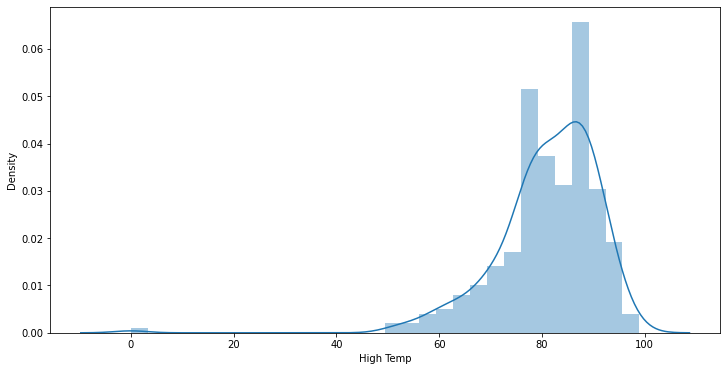

In [206]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["High Temp"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


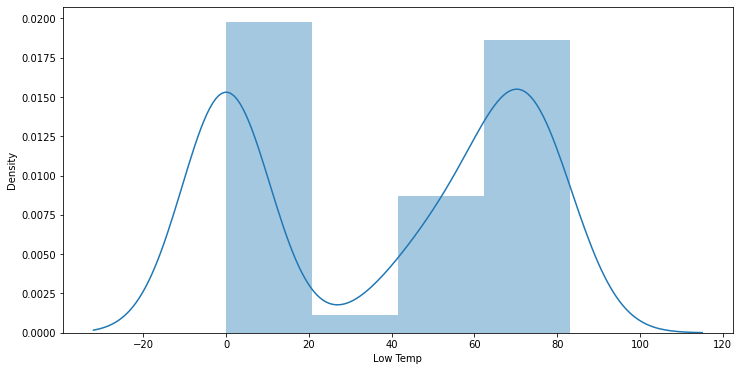

In [207]:

plt.figure(figsize=(12, 6))
sns.distplot(launch_data["Low Temp"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


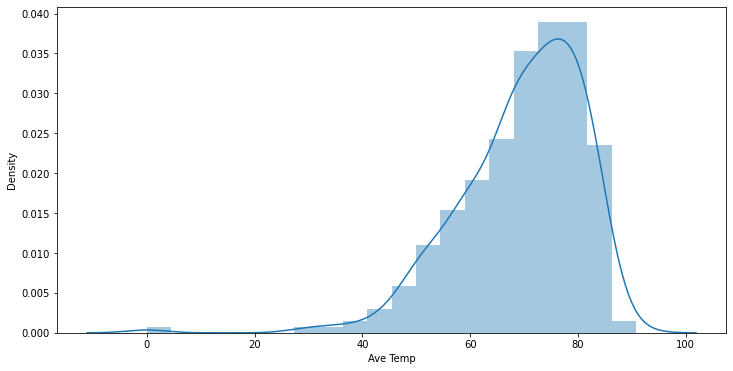

In [208]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["Ave Temp"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


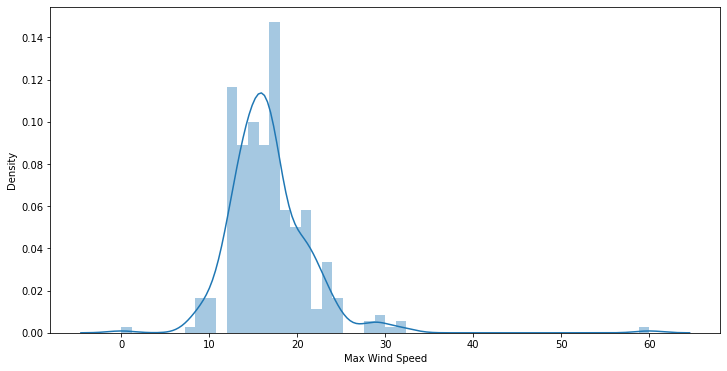

In [209]:
plt.figure(figsize=(12, 6))
sns.distplot(launch_data["Max Wind Speed"])

In [210]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [211]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    int64         
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

In [212]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data=launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1)

# Saving the rest of the data as input data
X = launch_data

In [213]:
X

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
0,1,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.00,0.08,0,16.0,15.0,0.0,0
1,1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.00,0.09,0,14.0,10.0,0.0,0
2,1,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.00,0.09,2,15.0,10.0,11.0,0
3,1,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.00,0.08,1,10.0,10.0,0.0,6
4,1,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.00,0.09,0,12.0,10.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,87.0,71.0,79.36,0.0,87.0,70.0,79.0,0.00,0.15,4,20.0,10.0,0.0,9
296,1,86.0,72.0,79.50,0.0,88.0,70.0,79.0,0.01,0.16,5,18.0,10.0,0.0,1
297,0,87.0,75.0,79.69,80.0,88.0,70.0,79.0,0.00,0.16,5,16.0,10.0,7.0,1
298,1,87.0,72.0,79.70,0.0,88.0,70.0,79.0,0.46,0.16,0,13.0,10.0,0.0,0


In [214]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

In [215]:
y

0      N
1      N
2      Y
3      N
4      N
      ..
295    N
296    N
297    Y
298    N
299    N
Name: Launched?, Length: 300, dtype: object

In [216]:
y[0] =='Y'

False

In [220]:
y0 = []
for i in y:
  y0.append(i)
  print(i)

0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0


In [222]:
y0
s = pd.Series(y0)
s

0      0
1      0
2      1
3      0
4      0
      ..
295    0
296    0
297    1
298    0
299    0
Length: 300, dtype: int64

In [ ]:
# y1 = []
# #i = 0
# for i in range(0,300):
#   if y[i] == 'Y':
#     y[i] = 1
#     print('1')
#   if y[i] == 'N':
#     y[i] = 0
#     print('0')
#   y1.append(y[i])
#   print(y1) 

In [160]:
s = pd.Series(y1)

In [161]:
s

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
295    1.0
296    1.0
297    1.0
298    1.0
299    1.0
Length: 300, dtype: float64

In [223]:
y = s
y

0      0
1      0
2      1
3      0
4      0
      ..
295    0
296    0
297    1
298    0
299    0
Length: 300, dtype: int64

In [224]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int64  
 1   High Temp                     300 non-null    float64
 2   Low Temp                      300 non-null    float64
 3   Ave Temp                      300 non-null    float64
 4   Temp at Launch Time           300 non-null    float64
 5   Hist High Temp                300 non-null    float64
 6   Hist Low Temp                 300 non-null    float64
 7   Hist Ave Temp                 300 non-null    float64
 8   Percipitation at Launch Time  300 non-null    float64
 9   Hist Ave Percipitation        300 non-null    float64
 10  Wind Direction                300 non-null    int64  
 11  Max Wind Speed                300 non-null    float64
 12  Visibility                    300 non-null    float64
 13  Wind 

In [259]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[15]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation= 'sigmoid'),
])

In [261]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [263]:
# Fitting the model to the training data
history = model.fit(X_train,y_train, validation_data = (X_test, y_test),epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 54ms/step - loss: 0.1839 - accuracy: 0.9250 - val_loss: 3.0279 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0345 - accuracy: 0.9833 - val_loss: 1.9500 - val_accuracy: 0.9833
Epoch 3/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0489 - accuracy: 0.9792 - val_loss: 2.1981 - val_accuracy: 0.9833
Epoch 4/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0700 - accuracy: 0.9625 - val_loss: 3.1149 - val_accuracy: 0.7167
Epoch 5/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.8363 - val_accuracy: 0.9500
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.5003 - val_accuracy: 0.9833
Epoch 7/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.2902 - val_accuracy: 0.9833
Epoch 8/100
8/8 [===

In [264]:
# Do prediction on test Data
y_pred = model.predict(X_test)
print(y_pred)

[[1.1352715e-06]
 [1.0000000e+00]
 [1.5368965e-05]
 [2.4052537e-05]
 [4.8481648e-05]
 [2.8046759e-06]
 [2.4482235e-06]
 [5.2075579e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.5212346e-06]
 [1.0000000e+00]
 [1.0853617e-05]
 [5.8476267e-06]
 [1.3701050e-05]
 [2.0383038e-06]
 [2.3528344e-05]
 [3.9203960e-06]
 [1.0000000e+00]
 [5.9817849e-06]
 [3.4065408e-06]
 [4.4760927e-06]
 [1.3670906e-06]
 [2.9721830e-05]
 [1.3437912e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.6177257e-06]
 [2.2269655e-06]
 [9.7032307e-06]
 [6.3162829e-06]
 [7.3876245e-06]
 [7.7132008e-06]
 [8.5695901e-06]
 [5.5415612e-06]
 [1.0000000e+00]
 [3.1685690e-06]
 [4.3616178e-06]
 [5.4071852e-06]
 [1.0000000e+00]
 [2.6387827e-06]
 [4.7912090e-06]
 [3.3398926e-05]
 [1.6193031e-05]
 [1.0000000e+00]
 [1.7454859e-05]
 [9.9939589e-06]
 [1.7864928e-06]
 [7.1613076e-06]
 [9.5687748e-05]
 [1.9682378e-05]
 [1.3673332e-06]
 [1.6832862e-06]
 [8.7919670e-06]
 [1.4112557e-05]
 [1.0523244e-06]
 [5.5026649e-06]
 [1.0000000e+0

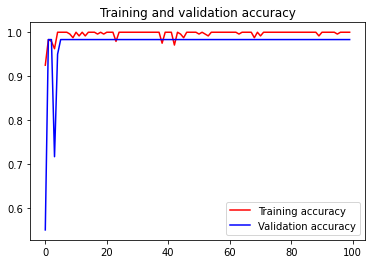

<Figure size 432x288 with 0 Axes>

In [265]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [267]:
model.save('rocket.h5')

In [269]:
!zip -r /content/saved_model /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 90%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 71%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 7%)


In [25]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

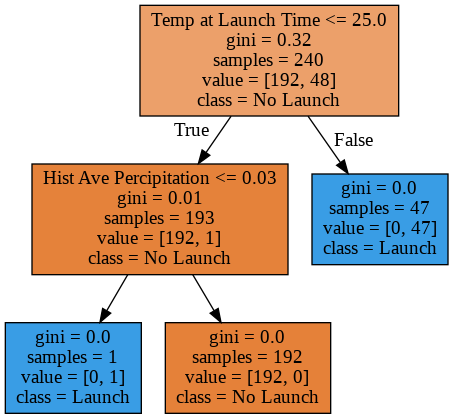

In [26]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')

In [27]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2


In [28]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

array(['N'], dtype=object)